In [1]:
%matplotlib inline

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
np.random.seed(43713)  # for reproducibility

data = pd.read_csv("2016-FCC-New-Coders-Survey-Data.csv")
data = data.reindex(np.random.permutation(data.index))

/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (21,57) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
print('Data Columns\n')
columns = dir(data)[0:111]
def combine(x,y): return x + '\t' + y
columns = reduce(combine, columns)
print(columns)


Data Columns

Age	AttendedBootcamp	BootcampFinish	BootcampFullJobAfter	BootcampLoanYesNo	BootcampMonthsAgo	BootcampName	BootcampPostSalary	BootcampRecommend	ChildrenNumber	CityPopulation	CodeEventBootcamp	CodeEventCoffee	CodeEventConferences	CodeEventDjangoGirls	CodeEventGameJam	CodeEventGirlDev	CodeEventHackathons	CodeEventMeetup	CodeEventNodeSchool	CodeEventNone	CodeEventOther	CodeEventRailsBridge	CodeEventRailsGirls	CodeEventStartUpWknd	CodeEventWomenCode	CodeEventWorkshop	CommuteTime	CountryCitizen	CountryLive	EmploymentField	EmploymentFieldOther	EmploymentStatus	EmploymentStatusOther	ExpectedEarning	FinanciallySupporting	Gender	HasChildren	HasDebt	HasFinancialDependents	HasHighSpdInternet	HasHomeMortgage	HasServedInMilitary	HasStudentDebt	HomeMortgageOwe	HoursLearning	Income	IsEthnicMinority	IsReceiveDiabilitiesBenefits	IsSoftwareDev	IsUnderEmployed	JobApplyWhen	JobPref	JobRelocateYesNo	JobRoleInterest	JobRoleInterestOther	JobWherePref	LanguageAtHome	MaritalStatus	MoneyForLearning

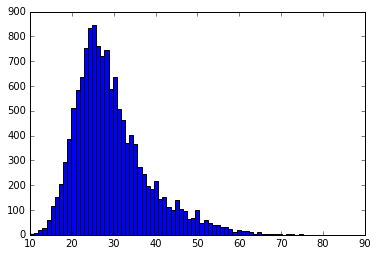

In [3]:
plt.hist(data.Age.dropna(), bins=77)
plt.show()

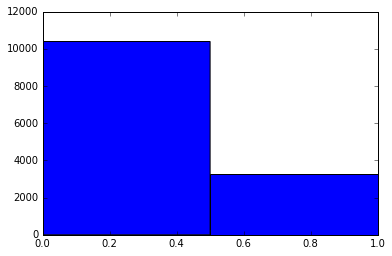

In [4]:
plt.hist(data.IsEthnicMinority.dropna(), bins=2)
plt.show()

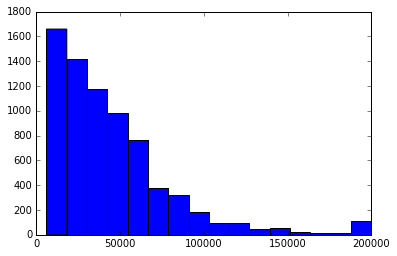

In [5]:
plt.hist(data.Income.dropna(), bins=16)
plt.show()

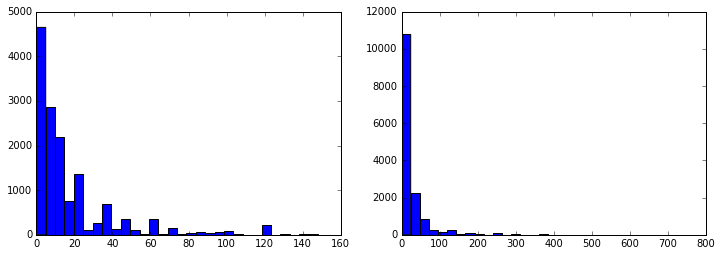

In [6]:
plt.figure(figsize=(12,4))

plt.subplot(121)
d = data.MonthsProgramming.dropna()
lessThan150 = np.array(filter(lambda x:x<150, d))

plt.hist(lessThan150, bins=30)
plt.subplot(122)
plt.hist(d, bins=30)
plt.show()

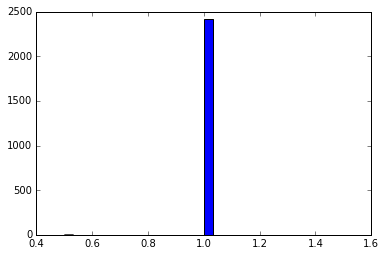

In [7]:
plt.hist(data.CodeEventHackathons.dropna(), bins=30)
plt.show()

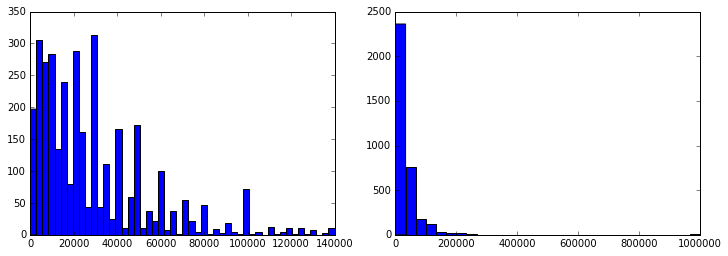

In [8]:
plt.figure(figsize=(12,4))

plt.subplot(121)
d = data.StudentDebtOwe.dropna()
lessThan150k = np.array(filter(lambda x:x<150000, d))

plt.hist(lessThan150k, bins=50)
plt.subplot(122)
plt.hist(d, bins=30)
plt.show()

In [9]:
bootcampFinish = data.BootcampFinish.dropna()
age = data.Age.dropna()
hasDebt = data.HasDebt.dropna()

print('Data Available')
print('BootcampFinish: ' + str(len(bootcampFinish)) + ', ' + str(100. * len(bootcampFinish) / len(data)) + '%')
print('Age: ' + str(len(age)) + ', ' + str(100. * len(age) / len(data)) + '%')
print('HasDebt: ' + str(len(hasDebt)) + ', ' + str(100. * len(hasDebt) / len(data)) + '%')


Data Available
BootcampFinish: 933, 5.97311139565%
Age: 13613, 87.1510883483%
HasDebt: 13610, 87.1318822023%


In [12]:
import xgboost as xgb

print('Predict BootcampFinish with XGBoost')

# Returns (t, x)
def mungeData(data, featureColumns, targetColumns):
    # Filter valid feature values
    for feature in featureColumns:
        data = data[np.isfinite(data[feature])]
        
    # Filter valid target values
    for target in targetColumns:
        data = data[np.isfinite(data[target])]
    
    # To matrix
    x = d[featureColumns].as_matrix() 
    if len(targetColumns) == 1:
        t = d[targetColumns].as_matrix()[:,0]
    else:
        t = d[targetColumns].as_matrix()
    assert len(t) == len(x)
    return t, x

# Drop data frames with missing data
t, x = mungeData(data, ['Age', 'HasDebt'], ['BootcampFinish'])
print('Data Available: ' + str(len(x)) + ', ' + str(100. * len(x) / len(data)) + '%')

# Create train/test data
testLength = len(d) * 5 / 10
xTest = x[:testLength]
tTest = t[:testLength]
xTrain = x[testLength:]
tTrain = t[testLength:]

# Train model
gbm = xgb.XGBClassifier(max_depth=50, n_estimators=200, learning_rate=0.01).fit(xTrain, tTrain)
yTest = gbm.predict(xTest)
print('Accuracy: ' + str(100. * (1 - np.sum(np.abs(yTest - tTest)) / len(yTest))) + '%')
print('Random Accuracy: ' + str(100. * max(np.mean(t), 1 - np.mean(t))))

Predict BootcampFinish with XGBoost
Data Available: 801, 5.12804097311%
Accuracy: 61.0%
Random Accuracy: 68.5393258427
